In [8]:
###This is our current plan 10/26/2020

##Data cleaning
#Drop the extra temperature columns
#make categorical variables for some numerical columns (hour of the day, weekends v.s. weekdays)

##Questions
#Finding the relationships between different predictors
#Predicting the price
#Comparing Uber and Lyft in their models for price prediction, weights of different predictors
#Events, traffic conditions

##EDA
#A summary on the selected variables, and weather, some basic graphs and crosstabs
#Get into how the data was collected

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data_path = 'rideshare_kaggle.csv'
rideshare_data = pd.read_csv(data_path,low_memory=False)

In [3]:
rideshare_data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [4]:
rideshare_data.hour.describe()

count    693071.000000
mean         11.619137
std           6.948114
min           0.000000
25%           6.000000
50%          12.000000
75%          18.000000
max          23.000000
Name: hour, dtype: float64

In [5]:
rideshare_data.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

(array([5.3900e+02, 2.1004e+04, 4.6243e+04, 4.0657e+04, 7.3532e+04,
        8.0549e+04, 4.2628e+04, 3.1197e+04, 5.5257e+04, 6.0156e+04,
        6.5459e+04, 6.2000e+04, 4.4619e+04, 1.6657e+04, 2.2870e+03,
        3.7340e+03, 1.1928e+04, 2.0303e+04, 3.1560e+03, 8.9600e+02,
        2.9020e+03, 3.5420e+03, 3.6000e+01, 1.2780e+03, 6.0000e+00,
        0.0000e+00, 4.0600e+02, 2.5900e+02, 1.8270e+03, 1.4000e+01]),
 array([0.02      , 0.28133333, 0.54266667, 0.804     , 1.06533333,
        1.32666667, 1.588     , 1.84933333, 2.11066667, 2.372     ,
        2.63333333, 2.89466667, 3.156     , 3.41733333, 3.67866667,
        3.94      , 4.20133333, 4.46266667, 4.724     , 4.98533333,
        5.24666667, 5.508     , 5.76933333, 6.03066667, 6.292     ,
        6.55333333, 6.81466667, 7.076     , 7.33733333, 7.59866667,
        7.86      ]),
 <a list of 30 Patch objects>)

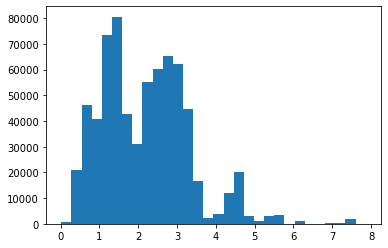

In [6]:
# something about the data
# only Nov and Dec
# even distribution in time of the day
# not everyday
# queried, not real passenger data
# no surge_multiplier for uber
plt.hist(rideshare_data.distance, bins = 30)

In [7]:
pd.crosstab(rideshare_data.surge_multiplier, rideshare_data.cab_type)

cab_type,Lyft,Uber
surge_multiplier,,
1.00,286433,385663
1.25,11085,0
1.50,5065,0
1.75,2420,0
2.00,2239,0
2.50,154,0
3.00,12,0
